## Praca domowa 4

#### Autor: Tomasz Modzelewski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a)

In [2]:
df[(df['Publisher'] == 'Nintendo') & (df['Year'] > 2015) & (df['NA_Sales'] < df['EU_Sales'])]['Name'].drop_duplicates()

4199     Mario & Sonic at the Rio 2016 Olympic Games
14703                                 Teddy Together
Name: Name, dtype: object

#### b)

In [3]:
df[df['Year'] == 2010].groupby('Genre')['Global_Sales'].sum().idxmax()

'Action'

#### c)

In [4]:
(
df.groupby('Genre')[['EU_Sales', 'JP_Sales']].
    mean().
    query("JP_Sales > EU_Sales").drop('EU_Sales', axis = 1).
    rename(index = {'Genre': 'Typ Gry'}, columns = {'JP_Sales': 'Średnia sprzedaż w Japonii'}).
    sort_values(by = 'Średnia sprzedaż w Japonii')
)

,Średnia sprzedaż w Japonii
Genre,
Strategy,0.073284
Puzzle,0.099439
Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

#### 1) Oryginalny wykres

![](wykres.png)
Źródło: http://m.radio.kielce.pl/pl/wiadomosci/juz-ponad-sto-zakazen-w-regionie-wykres,138175 (zakładka: REKORDY MIESIĘCZNE)

#### 2) Wykres w ggplot2

![](wykres2.png)
Źródło: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/ModzelewskiTomasz/ModzelewskiTomasz.pdf

#### 3) Poprawiony wykres

In [5]:
df_2 = pd.concat([
    pd.read_csv('zakazenia.txt'),
    pd.read_csv('zgony.txt')
], axis = 1)

df_2.columns = ['Zakażenia', 'Zgony']

df_2.index = pd.date_range(start = '3/4/2020', periods = len(df_2))

df_2

,Zakażenia,Zgony
2020-03-04,0,0
2020-03-05,0,0
2020-03-06,0,0
2020-03-07,0,0
2020-03-08,0,0
...,...,...
2021-10-27,125,6
2021-10-28,135,4
2021-10-29,136,2
2021-10-30,194,2


In [6]:
records = df_2.groupby(df_2.index.to_period('M')).max().reset_index().rename(columns = {'index': 'Miesiąc'})
records = pd.melt(records, id_vars=['Miesiąc'])
records

,Miesiąc,variable,value
0,2020-03,Zakażenia,12
1,2020-04,Zakażenia,18
2,2020-05,Zakażenia,34
3,2020-06,Zakażenia,40
4,2020-07,Zakażenia,29
...,...,...,...
35,2021-06,Zgony,18
36,2021-07,Zgony,3
37,2021-08,Zgony,1
38,2021-09,Zgony,4


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

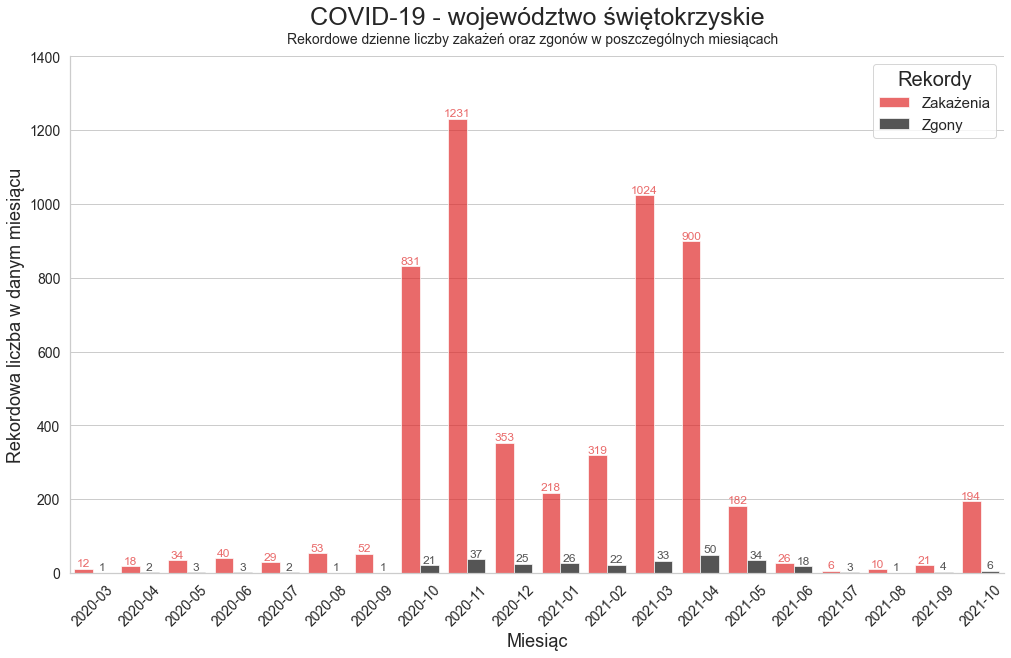

In [8]:
sns.set_theme(style="whitegrid")

fig = sns.catplot(
    data = records, 
    x = 'Miesiąc', 
    y = 'value', 
    hue = 'variable', 
    kind = 'bar', 
    height = 8,
    aspect = 7/4,
    alpha = 2/3,
    palette = sns.color_palette(['red', 'black']),
    legend = False
)
fig.set_xticklabels(rotation=45, fontsize=14)
fig.set_yticklabels(fontsize=14)

plt.legend(fontsize=15, title = 'Rekordy', title_fontsize=20)
plt.title(fontsize=25, label = 'COVID-19 - województwo świętokrzyskie', y = 1.05, x = 0.5)
plt.suptitle(fontsize=14, t = 'Rekordowe dzienne liczby zakażeń oraz zgonów w poszczególnych miesiącach', y = 1.02, x = 0.52)
plt.xlabel(xlabel='Miesiąc', fontsize=18)
plt.ylabel(ylabel='Rekordowa liczba w danym miesiącu', fontsize=18)

# Dodawanie liczb nad słupkami
ax = fig.facet_axis(0,0)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color=container[0].get_facecolor())

fig

Powyższy wykres jest lepszy od dwóch pozostałych. 

W stosunku do pierwszego, oryginalnego wykresu, poprawiono te same błędy - użyto adekwatnego w tej sytuacji wykresu słupkowego (zamiast niejednoznacznego liniowego, mylnie sugerującego istnienie wartości pośrednich pomiędzy poszczególnymi rekordami), a także zadbano o możliwość łatwego odczytania danych (szczególnie jest to istotne w miesiącach, w których obie wielkości są bardzo małe).

Wykres wykonany za pomocą matplotlib i seaborn jest również znacznie bardziej atrakcyjny niż ten wykonany w ggplot2. Po pierwsze, tło stanowią tutaj szare linie na białym tle, a nie szara krata, dzięki czemu wykres jest schludniejszy. Po drugie, użyłem mniej kontrastujących barw (również czerwony i czarny, lecz inne odcienie), co jest znacznie bardziej przyjemne dla oka. Po trzecie, znacznie lepiej umiejscowiona jest legenda - umieszczona jest bowiem wewnątrz wykresu i w prostokącie o zaokrąglonych rogach, co sprawa, iż wygląda ona bardziej profesjonalnie.